Q1. What is the mathematical formula for a linear SVM?


The decision boundary for a linear SVM can be expressed as:

𝑓(𝑥)=𝑤
𝑇
𝑥
+
𝑏
f(x)=w 
T
 x+b
Where:


w is the weight vector (normal to the hyperplane)


x is the feature vector


b is the bias (intercept)

The predicted class:

Predict 
𝑦
={
+
1
if 
𝑤
𝑇
𝑥
+
𝑏
≥
0
−
1
otherwise
Predict y={ 
+1
−1
​
  
if w 
T
 x+b≥0
otherwise
​
 


Q2. What is the objective function of a linear SVM?

We aim to **maximize the margin** (distance between separating hyperplanes) while **minimizing classification errors**.

**Hard Margin (linearly separable data):**

\[
\min_{w, b} \frac{1}{2} \|w\|^2 \quad \text{subject to: } y_i(w^T x_i + b) \geq 1
\]

**Soft Margin (non-separable data):**

\[
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i \quad \text{subject to: } y_i(w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\]

Where:
- \( \xi_i \): slack variables for misclassification
- \( C \): regularization parameter (controls trade-off between margin and misclassification)

Q3. What is the kernel trick in SVM?

The **kernel trick** allows SVM to operate in **higher-dimensional space** without computing the transformation explicitly.

For example:
- Linear Kernel: \( K(x, x') = x^T x' \)
- Polynomial Kernel: \( K(x, x') = (x^T x' + c)^d \)
- RBF (Gaussian): \( K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right) \)

It helps separate non-linearly separable data.

---

Q4. What is the role of support vectors in SVM Explain with example

**Support Vectors** are the data points **closest to the decision boundary (hyperplane)**. They define the position and orientation of the hyperplane.

 Intuition:
- The decision boundary would change if a support vector is removed.
- Other points have no effect on the hyperplane.

**Example:**

Consider 2D points:
- Class A: (1, 2), (2, 3), (2, 0)
- Class B: (6, 5), (7, 7), (8, 6)

Only the **closest point(s)** from each class to the margin will be support vectors.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

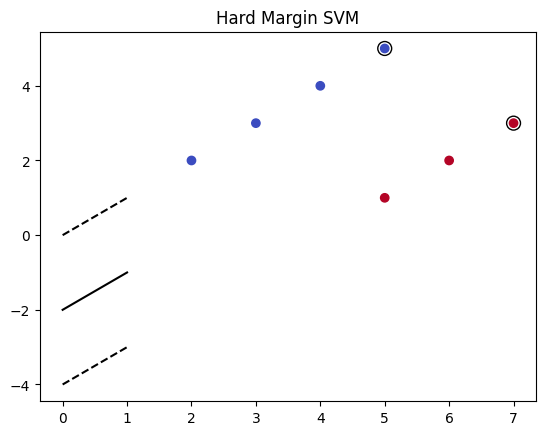

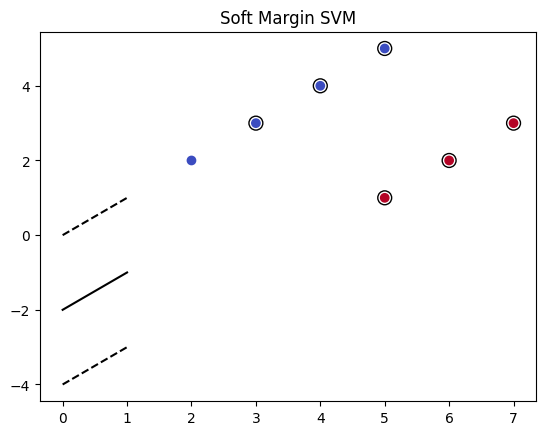

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

# Sample data
X = np.array([[2,2],[3,3],[4,4],[5,5],[5,1],[6,2],[7,3]])
y = np.array([0,0,0,0,1,1,1])

clf_hard = svm.SVC(kernel='linear', C=1e10)  # Hard margin (large C)
clf_soft = svm.SVC(kernel='linear', C=0.1)   # Soft margin (small C)

def plot_svm(clf, X, y, title):
    plt.figure()
    clf.fit(X, y)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Plot separating hyperplane
    w = clf.coef_[0]
    b = clf.intercept_[0]
    xx = np.linspace(xlim[0], xlim[1])
    yy = -(w[0] * xx + b) / w[1]
    
    # Margins
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + (w[0] / w[1])**2) * margin
    yy_up = yy + np.sqrt(1 + (w[0] / w[1])**2) * margin

    # Plot
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

plot_svm(clf_hard, X, y, "Hard Margin SVM")
plot_svm(clf_soft, X, y, "Soft Margin SVM")


Q6. SVM Implementation through Iris dataset.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Use only 2 classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train SVM
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[14  0]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



Bonus

In [3]:
class LinearSVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Compare with sklearn
svm_custom = LinearSVM()
svm_custom.fit(X_train, y_train)
pred_custom = svm_custom.predict(X_test)

from sklearn.metrics import accuracy_score
print("Custom SVM Accuracy:", accuracy_score(y_test, pred_custom))
print("Sklearn SVM Accuracy:", accuracy_score(y_test, clf.predict(X_test)))


Custom SVM Accuracy: 0.44
Sklearn SVM Accuracy: 1.0
